## Import

In [109]:
import librosa as lr
import librosa.display 
import IPython.display as ipd
from numpy.linalg import norm
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from dtw import dtw
import speech_recognition as sr
import os
import sklearn

### Load

In [71]:
audio_files_other= glob('E:\sot\wav_other/*.wav')

In [72]:
print(len(audio_files))
print(len(audio_files_other))

10
10


In [73]:
ipd.Audio(audio_files[0])

In [74]:
ipd.Audio(audio_files_other[0])

In [75]:
audio_me = []
sr_me = [] 

audio_other = []
sr_other = []

for i in range (len(audio_files)):
    audio , sr = lr.load(audio_files[i])
    audio_me.append(audio)
    sr_me.append(sr)
    
    audioo , srr = lr.load(audio_files_other[i])
    audio_other.append(audioo)
    sr_other.append(srr)


### Diagram display

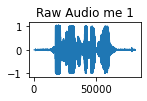

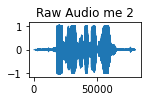

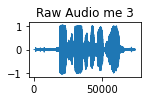

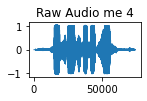

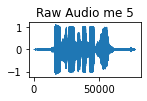

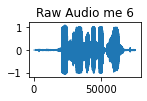

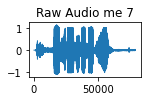

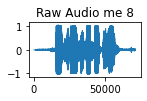

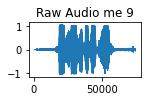

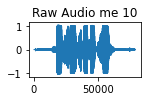

In [76]:
for i in range (len(audio_files)):
    fig , ax = plt.subplots(figsize=(4,2))
    pd.Series(audio_me[i]).plot(figsize=(2,1),lw =1 , title = f'Raw Audio me {i+1}') 
    plt.show

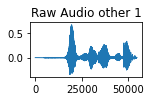

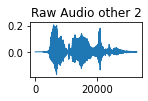

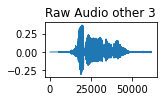

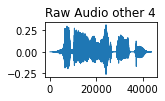

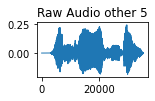

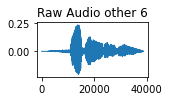

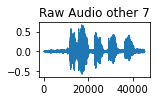

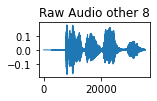

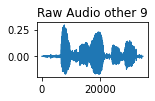

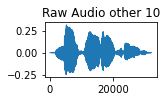

In [78]:
for i in range (len(audio_files)):
    fig , ax = plt.subplots(figsize=(4,2))
    pd.Series(audio_other[i]).plot(figsize=(2,1),lw =1 , title = f'Raw Audio other {i+1}') 
    plt.show

### Remove silent

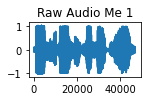

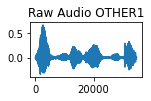

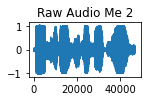

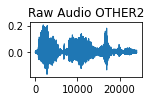

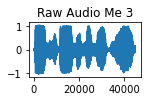

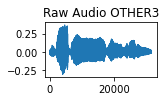

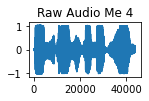

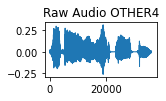

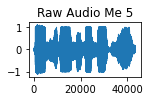

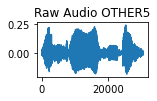

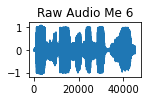

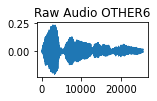

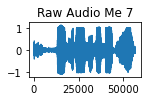

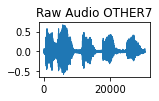

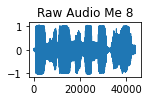

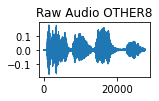

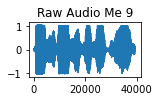

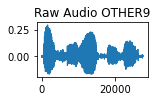

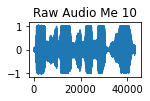

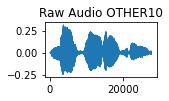

In [79]:
audio_trimmed_me = []
audio_trimmed_other = []
for i in range (len(audio_files)):
    audio_trimmed , _ = lr.effects.trim(audio_me[i] , top_db=20)
    audio_trimmed_me.append(audio_trimmed)
    fig , ax = plt.subplots(figsize=(4,2))
    pd.Series(audio_trimmed).plot(figsize=(2,1),lw =1 , title = f'Raw Audio Me {i+1}') 
    plt.show
    audio_trimmed , _ = lr.effects.trim(audio_other[i] , top_db=20)
    audio_trimmed_other.append(audio_trimmed)
    fig , ax = plt.subplots(figsize=(4,2))
    pd.Series(audio_trimmed).plot(figsize=(2,1),lw =1 , title = f'Raw Audio OTHER{i+1}') 
    plt.show

### frame 

In [80]:
def framing(audio_trimmed, fs=16000, win_len=0.025, win_hop=0.01):
    
    frame_length = win_len * fs
    frame_step = win_hop * fs
    
    signal_length = len(audio_trimmed)
    frames_overlap = frame_length - frame_step

    num_frames = np.abs(signal_length - frames_overlap) // np.abs(frame_length - frames_overlap)
    rest_samples = np.abs(signal_length - frames_overlap) % np.abs(frame_length - frames_overlap)
     
    if rest_samples != 0:
        pad_signal_length = int(frame_step - rest_samples)
        z = np.zeros((pad_signal_length))
        pad_signal = np.append(audio_trimmed, z)
        num_frames += 1
    else:
        pad_signal = audio_trimmed

    
    frame_length = int(frame_length)
    frame_step = int(frame_step)
    num_frames = int(num_frames)

 
    idx1 = np.tile(np.arange(0, frame_length), (num_frames, 1))
    idx2 = np.tile(np.arange(0, num_frames * frame_step, frame_step),
                    (frame_length, 1)).T
    indices = idx1 + idx2
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

In [81]:
frame_me = []
frame_other = []

for i in range (len(audio_files)):
    frame = framing(audio_trimmed = audio_me[i] ,fs=16000, win_len=0.025, win_hop=0.01  )
    frame_me.append(frame)
    print(f"frame me {i+1} = {frame}")
    frame = framing(audio_trimmed = audio_other[i] ,fs=16000, win_len=0.025, win_hop=0.01  )
    frame_other.append(frame)
    print(f"frame other {i+1} = {frame}")

frame me 1 = [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.01828724 -0.01406842 -0.00955665 ...  0.00048713  0.00039361
   0.00019447]
 [-0.01558785 -0.01592276 -0.01548523 ...  0.          0.
   0.        ]
 [ 0.01130182  0.00932124  0.00653778 ...  0.          0.
   0.        ]]
frame other 1 = [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.00357719 -0.0031395   0.00031698 ...  0.00203193  0.00199475
   0.00120055]
 [-0.00307301 -0.0032769  -0.00337716 ... -0.00235454 -0.00212541
  -0.00214473]
 [ 0.00020685 -0.00269932 -0.00559572 ...  0.          0.
   0.        ]]
frame me 2 = [[ 0.00000000e+00  0.00000000e+00  0.00000000e

# Feature extraction: 

### Zero crossing rate 

In [82]:
z_me = []
z_other = []
for i in range (len(audio_files)):
    zero_crossing = lr.zero_crossings(frame_me[i] , pad = False)
    z_me = sum(zero_crossing)
    
    zero_crossing = lr.zero_crossings(frame_other[i] , pad = False)
    z_other = sum(zero_crossing)
    
print(z_me  , "   \n\n  " )
print(z_other)

[ 0 44 50 43 61 44 50 50 40 52 50 39 45 50 38 54 50 47 57 48 50 50 53 44
 52 60 46 50 46 60 56 58 43 48 60 54 47 51 50 57 39 41 41 47 50 55 54 47
 46 52 53 53 38 51 50 45 45 49 44 43 47 46 49 45 48 42 46 43 52 46 59 51
 47 47 47 50 57 47 56 47 54 42 54 46 42 54 48 54 50 48 35 57 42 51 47 41
 45 48 37 56 48 44 45 41 49 58 43 51 49 47 54 52 51 49 47 51 43 46 59 47
 50 43 50 43 53 50 49 58 48 45 40 45 44 54 42 35 51 51 52 41 50 63 48 45
 44 50 51 54 45 50 47 49 42 41 52 50 58 56 45 47 46 44 50 43 61 44 50 50
 40 52 50 39 45 50 38 54 50 47 57 48 50 50 53 44 52 60 46 50 46 60 56 58
 43 48 60 54 47 51 50 57 39 41 41 47 50 55 54 47 46 52 53 53 38 51 50 45
 45 49 44 43 47 46 49 45 48 42 46 43 52 46 59 51 47 47 47 50 57 47 56 47
 54 42 54 46 42 54 48 54 50 48 35 57 42 51 47 41 45 48 37 56 48 44 45 41
 49 58 43 51 49 47 54 52 51 49 47 51 43 46 59 47 50 43 50 43 53 50 49 58
 48 45 40 45 44 54 42 35 51 51 52 41 50 63 48 45 44 50 51 54 45 50 47 49
 42 41 52 50 58 56 45 47 46 44 50 43 61 44 50 50 40

### spectrogram

In [83]:
s_db_ME = []
s_db_OTHER = []
for i in range (len(audio_files)):
    D = lr.stft(audio_trimmed_me[i])
    s_db = lr.amplitude_to_db(np.abs(D) , ref = np.max)
    s_db_ME.append(s_db)
    
    D = lr.stft(audio_trimmed_other[i])
    s_db = lr.amplitude_to_db(np.abs(D) , ref = np.max)
    s_db_OTHER.append(s_db)

##### for example

<function matplotlib.pyplot.show(*args, **kw)>

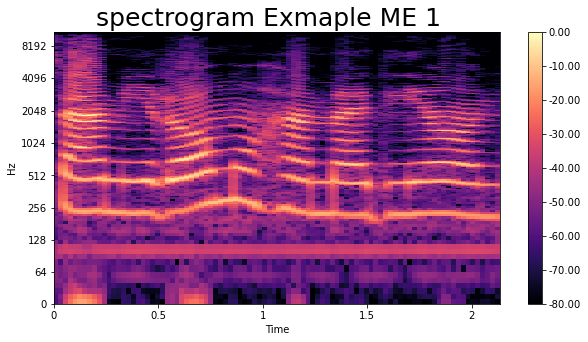

In [84]:
fig , ax = plt.subplots(figsize=(10,5))
img = lr.display.specshow(s_db_ME[0] , x_axis = 'time' , y_axis = 'log' , ax=ax)

ax.set_title('spectrogram Exmaple ME 1  ' , fontsize = 25 )
fig.colorbar(img , ax=ax , format =f'%0.2f')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

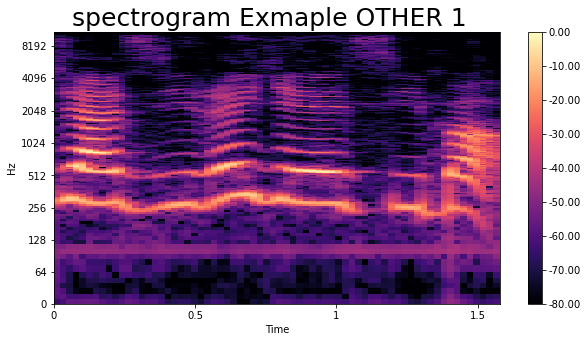

In [85]:
fig , ax = plt.subplots(figsize=(10,5))
img = lr.display.specshow(s_db_OTHER[0] , x_axis = 'time' , y_axis = 'log' , ax=ax)

ax.set_title('spectrogram Exmaple OTHER 1  ' , fontsize = 25 )
fig.colorbar(img , ax=ax , format =f'%0.2f')
plt.show

### mel spectrogram

In [86]:
s_db_mel_other = [] 
s_db_mel_me = []
for i in range(len(audio_files)):
    
    
    s = lr.feature.melspectrogram(y = audio_trimmed_me[i] , sr =sr , n_mels = 128*2 )
    s_db_mel = lr.amplitude_to_db(s , ref=np.max)
    s_db_mel_me.append(s_db_mel)
    
    s = lr.feature.melspectrogram(y = audio_trimmed_other[i] , sr =sr , n_mels = 128*2 )
    s_db_mel = lr.amplitude_to_db(s , ref=np.max)
    s_db_mel_other.append(s_db_mel)

##### for example

<function matplotlib.pyplot.show(*args, **kw)>

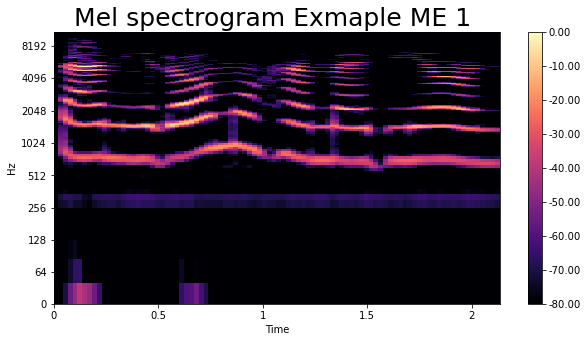

In [87]:
fig , ax = plt.subplots(figsize=(10,5))
img = lr.display.specshow(s_db_mel_me[0] , x_axis = 'time' , y_axis = 'log' , ax=ax)

ax.set_title('Mel spectrogram Exmaple ME 1 ' , fontsize = 25 )
fig.colorbar(img , ax=ax , format =f'%0.2f')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

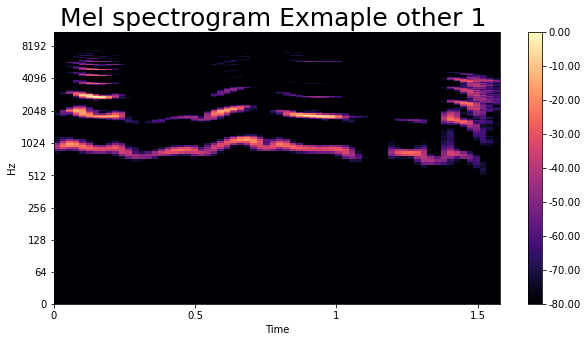

In [88]:
fig , ax = plt.subplots(figsize=(10,5))
img = lr.display.specshow(s_db_mel_other[0] , x_axis = 'time' , y_axis = 'log' , ax=ax)

ax.set_title('Mel spectrogram Exmaple other 1 ' , fontsize = 25 )
fig.colorbar(img , ax=ax , format =f'%0.2f')
plt.show

### Mfcc

In [89]:
mfcc_other = []
mfcc_me = []
for i in range(len(audio_trimmed_me)):
    mfcc_me.append(lr.feature.mfcc(audio_trimmed_me[i], sr_me[i]))
    
    mfcc_other.append(lr.feature.mfcc(audio_trimmed_other[i], sr_other[i]))
    


C:\Users\Samira\AppData\Local\Temp\ipykernel_6932\2627622877.py:4: FutureWarning: Pass y=[-0.03198801 -0.01902271 -0.02618139 ... -0.05675325 -0.05974566
 -0.06478433], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_me.append(lr.feature.mfcc(audio_trimmed_me[i], sr_me[i]))
C:\Users\Samira\AppData\Local\Temp\ipykernel_6932\2627622877.py:6: FutureWarning: Pass y=[-0.01203488 -0.01106553 -0.00396119 ... -0.00041425 -0.0014909
 -0.00317131], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_other.append(lr.feature.mfcc(audio_trimmed_other[i], sr_other[i]))
C:\Users\Samira\AppData\Local\Temp\ipykernel_6932\2627622877.py:4: FutureWarning: Pass y=[-0.05022769 -0.03032087 -0.0138476  ... -0.04445475 -0.02221278
  0.00647522], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_me.append(lr.feature.mfcc(audi

In [90]:
mfcc_other[0].shape

(20, 69)

###### an Example for my voice & others voice Displaying the MFCC :

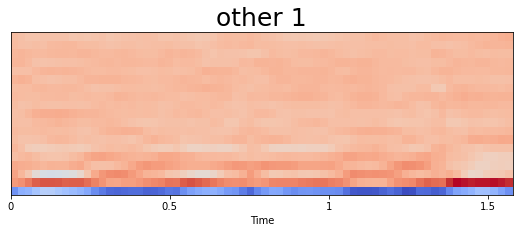

In [91]:
plt.figure(figsize=(9,3))
plt.title(' other 1 ' , fontsize = 25 )
lr.display.specshow(mfcc_other[0] , sr=sr_other[0] , x_axis='time' )

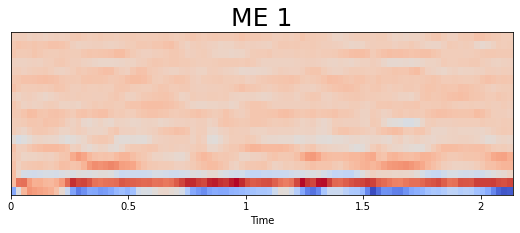

In [92]:
plt.figure(figsize=(9,3))
plt.title(' ME 1 ' , fontsize = 25 )
lr.display.specshow(mfcc_me[0] , sr=sr_me[0] , x_axis='time' )

### Distance :

#####  me vs me :

In [95]:
dist_me = []
for i in range(5):
    dist, cost, acc_cost, path = dtw(mfcc_me[i].T, mfcc_me[i+1].T, dist=lambda x, y: norm(x - y, ord=1))
    dist_me.append(dist)
    print (f'Normalized distance between the two sounds of me {[i+1]}:', dist)

Normalized distance between the two sounds of me [1]: 14269.478790283203
Normalized distance between the two sounds of me [2]: 16177.769592285156
Normalized distance between the two sounds of me [3]: 14156.712921142578
Normalized distance between the two sounds of me [4]: 14585.640899658203
Normalized distance between the two sounds of me [5]: 11040.073585510254


#####  me vs othere :

In [94]:
for i in range(5):
    dist, cost, acc_cost, path = dtw(mfcc_other[i].T, mfcc_me[i].T, dist=lambda x, y: norm(x - y, ord=1))
    print (f'Normalized distance between the two sounds of other{[i+1]}:', dist)
    


Normalized distance between the two sounds of other[1]: 50166.52880859375
Normalized distance between the two sounds of other[2]: 52152.17025756836
Normalized distance between the two sounds of other[3]: 48509.93408203125
Normalized distance between the two sounds of other[4]: 49783.141662597656
Normalized distance between the two sounds of other[5]: 49039.04895019531


In [99]:
Thresholdـlevel_sum = 0
for i in range(5):
    
    Thresholdـlevel_sum = Thresholdـlevel_sum + dist_me[i]
    
Threshold_level = Thresholdـlevel_sum /5 


In [100]:
Threshold_level

14045.935157775879